# Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#quest">Questions</a></li> 
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li> 
</ul>

<a id='intro'></a>
## Introduction

> This report examines the 'tmdb-movies' database (The Movies DataBase), which contains 10,866 entries. There are 21 fields within each record. Only 5 columns will be utilized for both analyses (popularity, budget_adj, revenue_adj, genres, and release_date). It will explore the variations in profits that have been adjusted for inflation.

<a id='quest'></a>
## Questions
>    2 valuable questions that can be answered with this dataset:

                  1. What is the most profitable genre per month by average?
       
                  2. What are the most profitable months compared to movies with high popularity?

In [1690]:
# Import packages for functions and features.
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [1691]:
# Read data into a new dataframe.
indat = pd.read_csv('tmdb-movies.csv')

In [1692]:
# Create a copy of the dataframe to work with.
indata = indat;

### General Properties

In [1693]:
# Analyze the number of columns and rows within this dataframe.
print(indata.shape);

(10866, 21)


In [1694]:
# A quick view of many calculations executed upon the numbers contained within the dataframe.
indata.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [1695]:
# Displays the columns, datatypes, and columns identified to have null values (with a count total).
indata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The 5 columns used in this report are:  popularity, budget, revenue, genres, and release_date.

#### There are 23 null values in the genres column (10,866 - 10,843 = 23).

<a id='wrangling'></a>
## Data Wrangling:
### Remove NULL values, Reduce Columns, Convert Time & Calculate Profit

In [1696]:
# Drops the records that have NULL values in the genres column from the dataframe.
indata.dropna(subset = ['genres'], inplace=True)

# Displays the length to verify the removal of rows.
print(len(indata));

10843


#### The number of rows has been reduced to 10,843.

In [1697]:
# Checks for duplicated rows/values.
print(indata.duplicated());

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10843, dtype: bool


#### Displays 'False' for all - there are no duplicated rows/values.

In [1698]:
# Converts the column values to datetime format and creates a copy.
indata.release_date = pd.to_datetime(indata['release_date']).copy()

In [1699]:
# Extracts the month from the datetime format and creates a new column 'release_month' and creates a copy.
indata['release_month'] = indata['release_date'].dt.month.copy()

In [1700]:
# Drops all of the columns that are not utilized in these analyses.
indata.drop(['id', 'original_title', 'imdb_id', 'cast', 'homepage', 'director', 'release_year', 'vote_average', 'tagline', 'vote_count', 'keywords', 'overview', 'runtime', 'production_companies', 'budget', 'revenue', 'release_date'], axis=1, inplace=True)

In [1701]:
# Calculates the profit (revenue_adj - budget_adj) and inserts the values into a new column labeled 'profit'.
indata.insert(5,'profit', (indata.revenue_adj - indata.budget_adj))

# Displays the first row in the dataframe, showing the revised reduced columns.
indata.head(1)

,popularity,genres,budget_adj,revenue_adj,release_month,profit
0,32.985763,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09,6,1.254446e+09


<a id='eda'></a>
## Exploratory Data Analyses

In [1702]:
# Replaces all the zeroes ('0') with NaN, in the columns to be utilized in these analyses and creates a copy.
zero_attrbts = ['popularity', 'genres', 'budget_adj', 'revenue_adj', 'release_month', 'profit']
indata[zero_attrbts] = indata[zero_attrbts].apply(lambda cols: cols.replace(0,np.nan), axis = 1).copy()

# Displays the length of the dataframe after 
print(len(indata));

10843


Text(0.5, 1.0, 'Film Budgets')

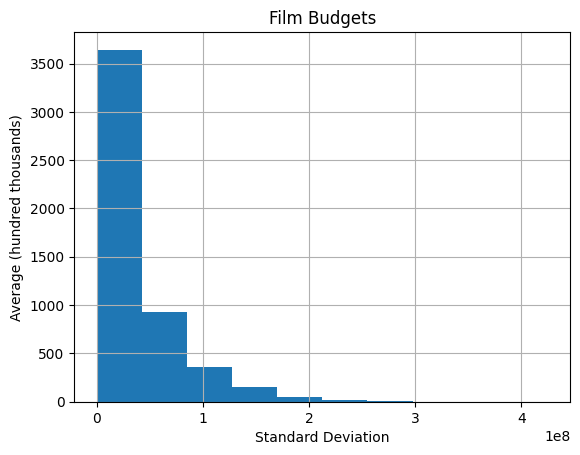

In [1703]:
# Creates a bar graph of the budget attribute (adjusted for inflation).
ax = indata['budget_adj'].hist()

# Labels the axes and title.
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Average (hundred thousands)')
ax.set_title('Film Budgets')

#### Approximately 75% of the movies in the database have a very high budget (adjusted for inflation) - An estimated $\$$350 million. 

In [1565]:
# Displays calculations of the budget_adj column data.
indata.budget_adj.describe()

count    5.169000e+03
mean     3.689487e+07
std      4.195793e+07
min      9.210911e-01
25%      8.102293e+06
50%      2.273036e+07
75%      5.008384e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

Text(0.5, 1.0, 'Film Revenues')

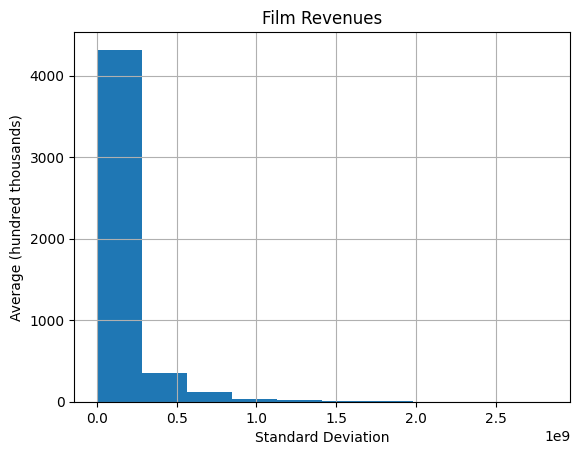

In [1705]:
# Creates a bar graph of the revenue attribute (adjusted for inflation).
ax2 = indata['revenue_adj'].hist()

# Labels the axes and title.
ax2.set_xlabel('Standard Deviation')
ax2.set_ylabel('Average (hundred thousands)')
ax2.set_title('Film Revenues')

#### The majority of the movies in this database have a significant revenue (adjusted for inflation) - Nearly $\$$ 450 million.

Text(0.5, 1.0, 'Film Profits')

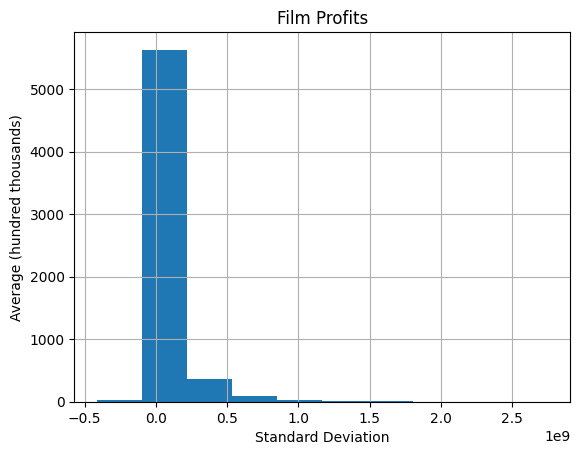

In [1704]:
# Creates a bar graph of the revenue attribute (adjusted for inflation).
ax3 = indata['profit'].hist()

# Labels the axes and title.
ax3.set_xlabel('Standard Deviation')
ax3.set_ylabel('Average (hundred thousands)')
ax3.set_title('Film Profits')

#### The maximum profit is $\$$ 2,750,136,650 and the minimum profit (loss) is $\$$ - 413,912,431 (adjusted for inflation).

#### Though the highest profit was in the billions and the lowest profit was a loss of nearly half a billion, most of the movies had a profit of
#### approximately $\$$ 550 million (adjusted for inflation).

In [1706]:
# Calculates the maximum profit and converts to an integer.
max_prof = indata.profit.max()
max_prof = int(max_prof)

In [1707]:
# Calculates the minimum profit and converts to an integer.
min_prof = indata.profit.min()
min_prof = int(min_prof)

In [1708]:
# Displays the maximum profit.
print(max_prof);

2750136650


In [1709]:
# Displays the minimum profit.
print(min_prof);

-413912431


### 1. What is the most profitable genre per month by average?

In [1710]:
# Create a copy of the cleaned dataframe, with only 3 columns.
dat = indata[['genres', 'profit', 'release_month']]

# Display the new dataframe copy.
dat.head(1)

,genres,profit,release_month
0,Action|Adventure|Science Fiction|Thriller,1.254446e+09,6


In [1711]:
# Creates a new data frame of columns (for each genre expanded from the list in each row) and creates a copy.
new = dat["genres"].str.split("|", n = 5, expand = True).copy()

# Displays the changes.
new.head(1)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None


In [1712]:
# Creates new labeled columns on the dat dataframe, 
# and populates with copied data from the new dataframe.
dat["gen1"] = new[0]
dat["gen2"] = new[1]
dat["gen3"] = new[2]
dat["gen4"] = new[3]
dat["gen5"] = new[4]

C:\Users\cucin\AppData\Local\Temp\ipykernel_17560\357477722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat["gen1"] = new[0]
C:\Users\cucin\AppData\Local\Temp\ipykernel_17560\357477722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat["gen2"] = new[1]


In [1713]:
# Creates a set copy of the dataframe, rather than a view.
dat = dat.copy()

# Display the columns on the revised dataframe.
dat.head(1)

,genres,profit,release_month,gen1,gen2,gen3,gen4,gen5
0,Action|Adventure|Science Fiction|Thriller,1.254446e+09,6,Action,Adventure,Science Fiction,Thriller,None


In [1714]:
# Creates a function that locates specific records based upon the criteria:
def month_prof(mon, gns):
        '''
        Searches all genre columns for a match (referenced from the genres list - 'gen_list').
        Returns the sum of the profit.
        '''
        
        k = dat[((dat['gen1'] == gen_list[gns]) | (dat['gen2'] == gen_list[gns]) | (dat['gen3'] == gen_list[gns]) | 
        (dat['gen4'] == gen_list[gns]) | (dat['gen5'] == gen_list[gns])) & (dat['release_month'] == mon)].profit.sum()
        return k

In [1715]:
# Creates a list of all the genres to reference in the function.
gen_list = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western']

In [1716]:
# Creates a new dataframe, with only 3 specific columns.
final_frame = pd.DataFrame(columns=['MONTH', 'GENRE', 'PROFITS'])

# Nested for loops to calculate and populate the final_frame dataframe.
# The outer loop iterates through the months.
for i in range(12): 
            
            # The inner loop populates the datframe with month, genre and profit sum values.
            for f in range(len(gen_list)):            
                final_frame.at[(20 * i) + f, 'GENRE'] = gen_list[f]
                final_frame.at[(20 * i) + f, 'PROFITS'] = month_prof(i+1, f)
                final_frame.at[(20 * i) + f, 'MONTH'] = i + 1              

In [1717]:
# Displays the profit total for every genre (20) for January - MONTH (1).
final_frame.head(20)

,MONTH,GENRE,PROFITS
0,1,Action,4333650417.722393
1,1,Adventure,4111809379.717778
2,1,Animation,1725457080.368404
3,1,Comedy,5198133937.671617
4,1,Crime,915904154.790405
5,1,Documentary,96631107.928079
6,1,Drama,2709192603.750153
7,1,Family,2322049683.518389
8,1,Fantasy,500720605.571175
9,1,Foreign,-45743382.595957


In [1718]:
# Creates a new dataframe, sets the indexes (axes), creates a series for the month column,
# converts profits to floating point, divides by 10**6 to have numbers in th same range,
# makes separate columns for months, and replaces all zeroes with a NaN 'value'.
profit_genre = final_frame.set_index(['MONTH', 'GENRE']).squeeze().astype(float).div(10**6).unstack('MONTH').replace({0:np.nan})

In [1719]:
# Displays the revised dataframe.
profit_genre

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
GENRE,,,,,,,,,,,,
Action,4333.650418,2184.578684,9004.587342,9635.094470,24373.298901,24676.749632,18868.183285,6432.133602,3836.570453,8424.794662,9065.843008,19310.301757
Adventure,4111.809380,2047.663162,12218.631383,10275.079312,23353.600198,27462.736189,14362.073787,2341.860432,3032.455783,8257.183294,16106.777694,20202.569587
Animation,1725.457080,1093.697735,3280.227300,435.578189,5654.175093,12086.516037,2195.886269,107.553951,1717.387924,4204.338172,7316.074924,2095.690591
Comedy,5198.133938,5314.974766,8337.303389,5221.616673,12509.246043,22123.302024,14898.608704,7295.109051,5085.323603,5747.577332,12068.117839,17488.262877
Crime,915.904155,2704.179085,3904.282896,3062.063225,3217.457662,6258.048108,6779.485532,3676.411194,3607.270913,3481.028967,2893.822712,7000.335446
Documentary,96.631108,89.475795,163.970752,152.284276,23.180882,151.867172,68.355105,2.530881,109.053640,-18.019165,7.209334,3.653890
Drama,2709.192604,5690.207097,8308.434172,5254.774545,7782.885468,14285.554052,11936.788407,8263.854764,8361.750352,5317.477734,16011.477655,27731.325438
Family,2322.049684,1405.730106,7072.191329,2980.214383,8546.709712,15895.362581,7085.106789,1874.902163,1769.408154,6426.221793,14737.270085,4745.415323
Fantasy,500.720606,1466.921479,5479.138103,3711.760577,10977.788320,10836.738985,7104.050202,1457.225807,468.627540,2313.741710,9164.726765,14123.789810


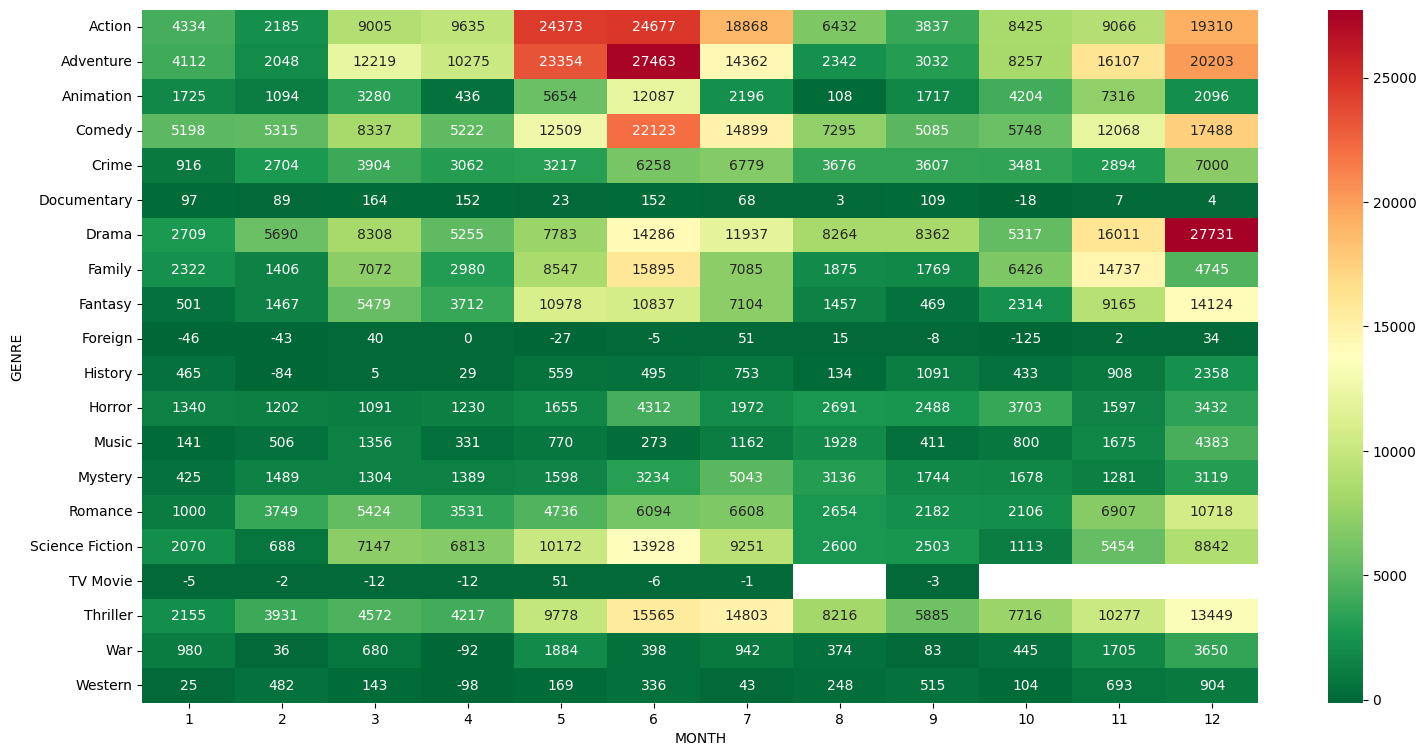

In [1720]:
# Specifies the size of the figure (heatmap).
plt.figure(figsize=[18, 9])

# Creates a Seaborn heatmap with '.0f' precision, value label on each rectangle,
# and red, yellow, green colors for the range.
sns.heatmap(profit_genre, annot=True, fmt=".0f", cmap="RdYlGn_r");

#### The highest profits are Drama films in December and Adventure movies in June, respectively.
#### The highest concentration of profitable movies are in the period of June/May.
#### The genres TV Movie, Documentary, Foreign, and Western are consistently the least profitable.

### 2. What are the most profitable months comparatively to movies with the highest popularity?

In [1721]:
# Creates a new dataframe copy, with only 3 columns.
indata1 = indata[['release_month', 'profit', 'popularity']]

# Displays the first row of the new dataframe (indata1) to view columns.
indata1.head(1)

,release_month,profit,popularity
0,6,1.254446e+09,32.985763


In [1722]:
indata.popularity.describe()

count    10843.000000
mean         0.647456
std          1.000986
min          0.000065
25%          0.208253
50%          0.384555
75%          0.715349
max         32.985763
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Film Popularity')

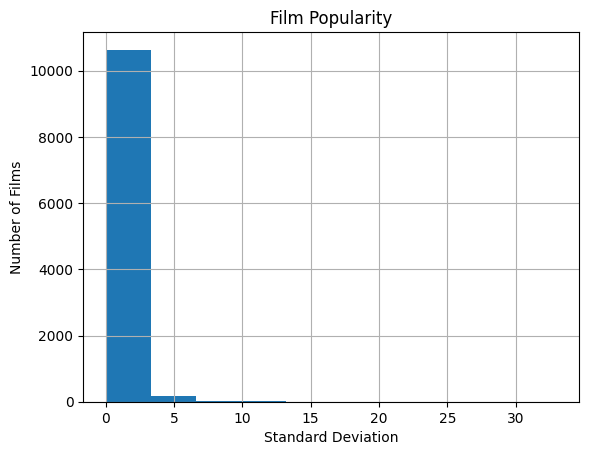

In [1723]:
# Creates a bar graph of the revenue attribute (adjusted for inflation).
ax4 = indata['popularity'].hist()

# Labels the axes and title.
ax4.set_xlabel('Standard Deviation')
ax4.set_ylabel('Number of Films')
ax4.set_title('Film Popularity')

In [1724]:
# Calculates the maximum popularity and converts to an integer.
max_pop = indata1.popularity.max()
max_pop = int(max_pop)

# Displays the maximum popularity.
print(max_pop);

32


In [1725]:
# Calculates the minimum popularity and converts to an integer.
min_pop = indata1.popularity.min()
min_pop = int(min_pop)

# Displays the minimum popularity.
print(min_pop);

0


#### Though the maximum popularity rating is 32 and the minimum rating is 0, nearly all the movies have a rating between 0 - 3.

In [1726]:
# Rename the release_month column to 'Month' - for aesthetics on the graph.
indata1 = indata1.rename(columns={'release_month': 'Month'})

# Displays the renamed column.
indata1.head(1)

,Month,profit,popularity
0,6,1.254446e+09,32.985763


In [1727]:
# Executing 2 calculations and renaming 2 columns with the aggregate function, 
# grouping by month, sorting by profitability and popularity, in descending order.
indata1 = (indata1.groupby(['Month']).agg(Profitability = ('profit', 'mean'), Popularity = ('popularity', 'max')).sort_values(['Profitability', 'Popularity'], ascending=False))

# Display the revised dataframe.
indata1      

,Profitability,Popularity
Month,,
6,1.196782e+08,32.985763
12,9.779938e+07,11.173104
11,9.072959e+07,24.949134
5,8.945936e+07,28.419936
7,8.419288e+07,14.311205
3,5.542314e+07,13.112507
4,4.244468e+07,9.335014
10,3.757919e+07,11.422751
8,3.681963e+07,6.098027


In [1728]:
# Convert the Popularity field into integer values.
indata1.Popularity = indata1.Popularity.astype('int')

In [1729]:
# Divides the Profitability column by 10**6.5 (and converts to an integer),
# which reduces the value to be in the same range as Popularity, to graph.
indata1['Profitability'] = indata1['Profitability'].div(10**6.5).astype('int')

# Displays the first row, with calculated values.
indata1.head(1)

,Profitability,Popularity
Month,,
6,37,32


Text(0.5, 1.0, 'Profitability Compared to Popularity by Month')

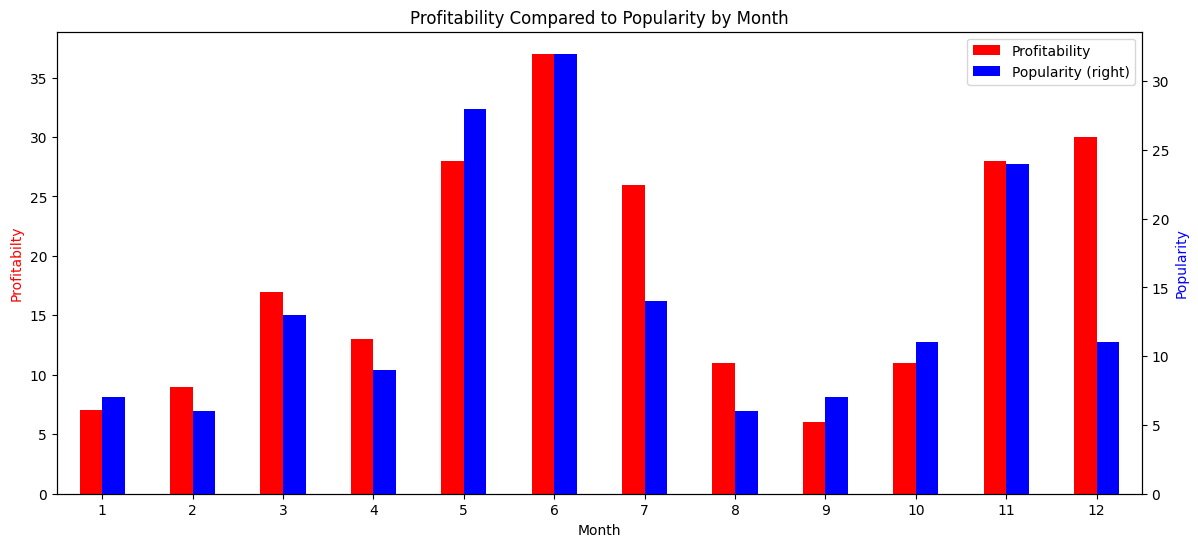

In [1730]:
# Creates a bar graph, with a secondary y-axis.
ax= indata1.sort_index().plot(kind='bar' , color=['red','b'], rot=0,figsize=[14, 6],secondary_y=['Popularity']);

# Labels the first (left) y-axis.
ax.set_ylabel('Profitabilty', color='red')

# Labels the second (right) y-axis, and rotates the label.
ax.right_ax.set_ylabel('Popularity', color='b', rotation=90);

# Sets a title for the graph.
ax.set_title('Profitability Compared to Popularity by Month')

<a id='conclusions'></a>
## Conclusions

### 1. What is the most profitable genre per month by average? 
### - Adventure is the most profitable genre in June, which is slightly trailed by action and comedy.
### - Drama is the most profitable genre in December, with action and adventure behind nearly 25%.

### 2. What are the most profitable months compared to movies with high popularity?
### - The summer season (May/June) is the most profitable season, in which popular movies are released.
### - The winter season (Dec/Nov) is the second most profitable, in which popular movies are released (average).

### June is the most profitable month for movies, which is correlated by the popularity rating.
### December is extremely profitable in comparison to the fairly low popularity of movies.
####
### A high popular demand for adventure, action, & comedies in the summer months (May & June).
### A high popular demand for drama, adventure, action, & comedies for the Holidays (December/November).
####
### A drama released during December is the most profitable.
### An adventure movie released in the early summer (June/May, respectively) is comparitively as profitable.
### An action film released in the early summer (June/May, respectively) is also comparitively as profitable.
### A comedy released in june is nearly as profitable as the other prior notable instances.

<a id='limitations'></a>
## Limitations

### 1) All profits were calculated as an average.
### 2) Some films may not have had all of the genres labeled in the genre attribute list.